In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2022-07-01 12:57:20--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.004s  

2022-07-01 12:57:21 (44.9 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [ ]:
import pandas as pd

df = pd.read_csv('BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', parse_dates=['Date'], index_col=['Date'])
df

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.654990,124.304660,124.751660,122.563490
2013-10-02,BTC,125.455000,123.654990,125.758500,123.633830
2013-10-03,BTC,108.584830,125.455000,125.665660,83.328330
2013-10-04,BTC,118.674660,108.584830,118.675000,107.058160
2013-10-05,BTC,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292


In [ ]:
bitcoin_prices = df[['Closing Price (USD)']].rename(columns={'Closing Price (USD)': 'Price'})
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


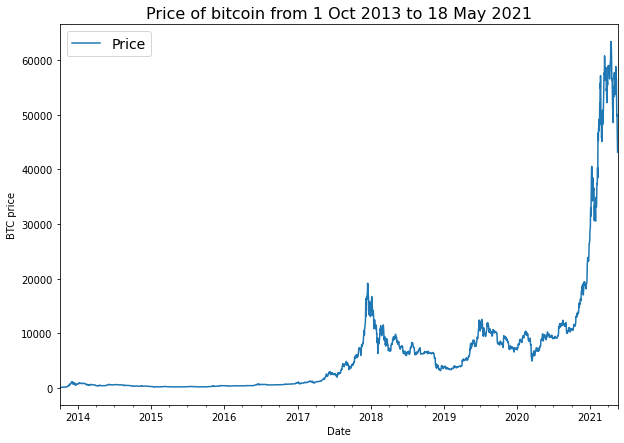

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel('BTC price')
plt.title('Price of bitcoin from 1 Oct 2013 to 18 May 2021', fontsize=16)
plt.legend(fontsize=14)

In [ ]:
# Reading csv via python instead of pandas
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', 'r') as f:
  csv_reader = csv.reader(f, delimiter=',')
  next(csv_reader) # skip headers
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], '%Y-%m-%d'))
    btc_price.append(float(line[2]))
  

timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

In [ ]:
# Create train and test sets for time series
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()

split_size = int(0.8*len(prices))

X_train, y_train = timesteps[:split_size], prices[:split_size]

X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

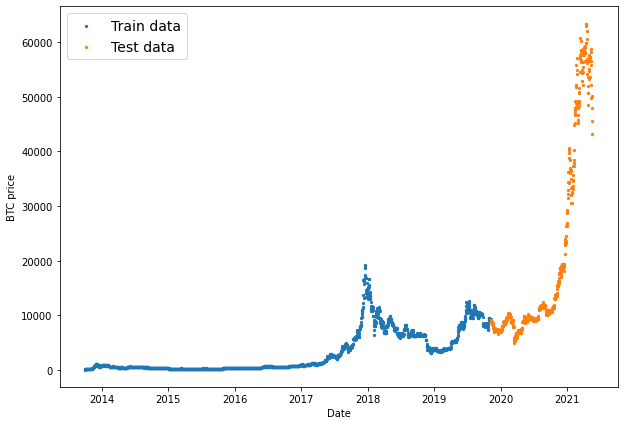

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label='Train data')
plt.scatter(X_test, y_test, s=5, label='Test data')
plt.xlabel('Date')
plt.ylabel('BTC price')
plt.legend(fontsize=14)
plt.show();

In [ ]:
# Creating a function to plot time series data

def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel('Time')
  plt.ylabel('BTC price')
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

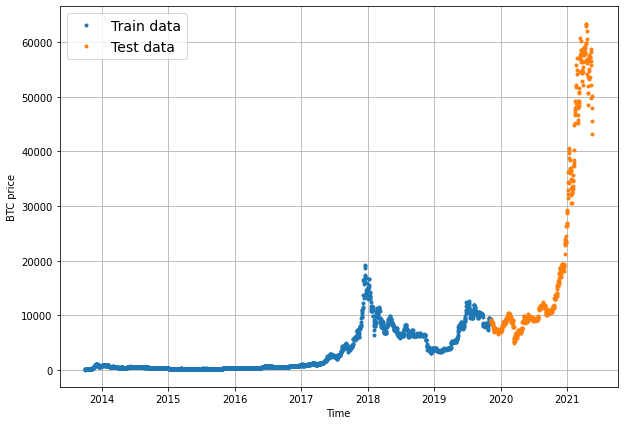

In [ ]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train, start=0, label='Train data')
plot_time_series(timesteps=X_test, values=y_test, label='Test data')

In [ ]:
# Model 0 Naive forecast method (baseline)

y_test[:10]

array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
       8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
       8500.64355816, 8469.2608989 ])

In [ ]:
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

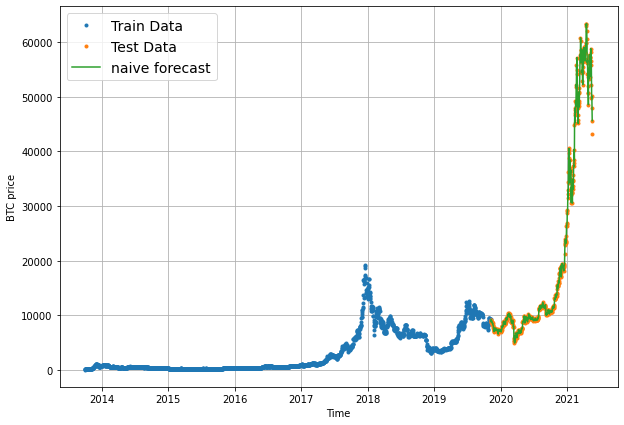

In [ ]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train, label='Train Data')
plot_time_series(timesteps=X_test, values=y_test, label='Test Data')
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format='-', label='naive forecast')

In [ ]:
import tensorflow as tf

In [ ]:
# MASE implementation

def mean_absolute_scaled_error(y_true, y_pred):
  
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

  return mae/mae_naive_no_season


In [ ]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182624

In [ ]:
# Create a function to evaluate models on various metrics

def evaluate_preds(y_true, y_pred):

  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {'mae': mae.numpy(),
          'mse': mse.numpy(),
          'rmse': rmse.numpy(),
          'mape': mape.numpy(),
          'mase': mase.numpy()}


In [ ]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)

naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

## Window our time series dataset to turn our data into a supervised learning problems

We will use a week worth of btc price to predict the price on the next day



In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Create function to label window data

def get_labelled_windows(x, horizon=HORIZON):
  return x[:, :-horizon], x[:,-horizon:]

In [ ]:
# test to see if our function works

test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis =0))
test_window, test_label 

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[7]], dtype=int32)>)

Create a function that allows us to do this:

1. [0, 1, 2, 3, 4, 5, 6]

2. 
```
[[0, 1, 2, 3, 4, 5, 6],
[1, 2, 3, 4, 5, 6, 7],
[2, 3, 4, 5, 6, 7, 8]]
```



In [ ]:
# Create function to view numpy arrays as windows
import numpy as np

def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  
  # create window of specific window_size (add the horizon on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # create a 2D array of multiple window steps (inus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T

  # index on the target array (a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [ ]:
# Turning into train test sets

def make_train_test_split(windows, labels, test_split=0.2):

  split_size = int(len(windows) * (1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
# Create model callback

import os

def create_model_checkpoint(model_name, save_path='model_experiment'):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            monitor='val_loss',
                                            verbose=0,
                                            save_best_only=True)

In [ ]:
# Model_1: Dense model (window=7, horizon=1) 

import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
                               layers.Dense(128, activation='relu'),
                               layers.Dense(HORIZON, activation='linear')
], name='model_1_dense')

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae', 'mse'])

model_1.fit(train_windows, train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - 7s 111ms/step - loss: 780.3455 - mae: 780.3455 - mse: 2312725.7500 - val_loss: 2279.6528 - val_mae: 2279.6528 - val_mse: 12772731.0000
Epoch 2/100
18/18 [==============================] - 1s 49ms/step - loss: 247.6756 - mae: 247.6756 - mse: 285481.1875 - val_loss: 1005.9993 - val_mae: 1005.9993 - val_mse: 3441833.2500
Epoch 3/100
18/18 [==============================] - 1s 51ms/step - loss: 188.4116 - mae: 188.4116 - mse: 171891.6094 - val_loss: 923.2862 - val_mae: 923.2861 - val_mse: 2868220.7500
Epoch 4/100
18/18 [==============================] - 1s 45ms/step - loss: 169.4340 - mae: 169.4340 - mse: 151700.5781 - val_loss: 900.5872 - val_mae: 900.5872 - val_mse: 2683715.5000
Epoch 5/100
18/18 [==============================] - 1s 56ms/step - loss: 165.0894 - mae: 165.0894 - mse: 145490.7812 - val_loss: 895.2237 - val_mae: 895.2237 - val_mse: 2564574.5000
Epoch 6/100
18/18 [==============================] - 1s 67ms/step - loss: 158.

In [ ]:
# Evaluate model_1

model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 585.9758 - mae: 585.9758 - mse: 1197802.1250


[585.9757690429688, 585.9757690429688, 1197802.125]

In [ ]:
# Load in saved best performing model_1 and evaluate again

model_1 = tf.keras.models.load_model('model_experiment/model_1_dense/')
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 568.9510 - mae: 568.9510 - mse: 1171743.6250


[568.9510498046875, 568.9510498046875, 1171743.625]

Making forecast with a model

1. Take in a train model
2. Take in some input data (same kind of data the model was trained on)
3. Passes the input data to the model's predict() method
4. Returns the predictions



In [ ]:
def make_preds(model, input_data):

  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [ ]:
model_1_preds = make_preds(model_1, test_windows)
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8861.71 , 8769.887, 9015.711, 8795.519, 8723.811, 8730.111,
       8691.952, 8502.054, 8460.961, 8516.548], dtype=float32)>

In [ ]:
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'mae': 568.9511,
 'mape': 2.5448983,
 'mase': 0.99948955,
 'mse': 1171743.8,
 'rmse': 1082.4711}

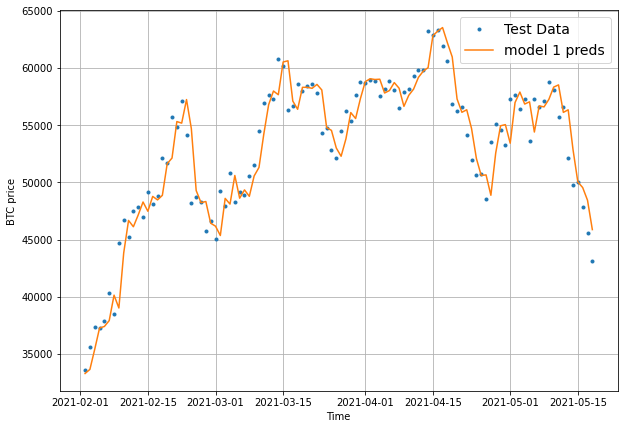

In [ ]:
# plot model_1 predictions
offset=450
plt.figure(figsize=(10,7))

plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels[:, 0], start=offset, label='Test Data')

plot_time_series(timesteps=X_test[-len(test_windows):],values=model_1_preds, start=offset, format='-', label='model 1 preds')

Model 2: Dense model (window=30, horizon=1)

In [ ]:
HORIZON = 1
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)

len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
                               layers.Dense(128, activation='relu'),
                               layers.Dense(HORIZON, activation='linear')
], name='model_2_dense')

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae', 'mse'])

model_2.fit(train_windows, train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

Epoch 1/100
18/18 [==============================] - 1s 32ms/step - loss: 1097.0399 - mae: 1097.0399 - mse: 4741506.0000 - val_loss: 3900.2537 - val_mae: 3900.2537 - val_mse: 32752730.0000
Epoch 2/100
18/18 [==============================] - 0s 25ms/step - loss: 428.0732 - mae: 428.0732 - mse: 811548.2500 - val_loss: 1587.0745 - val_mae: 1587.0745 - val_mse: 6817661.5000
Epoch 3/100
18/18 [==============================] - 0s 27ms/step - loss: 279.7655 - mae: 279.7655 - mse: 363083.0625 - val_loss: 1220.6888 - val_mae: 1220.6888 - val_mse: 4447002.0000
Epoch 4/100
18/18 [==============================] - 0s 25ms/step - loss: 224.3637 - mae: 224.3637 - mse: 225072.2188 - val_loss: 1160.1572 - val_mae: 1160.1572 - val_mse: 3837504.2500
Epoch 5/100
18/18 [==============================] - 0s 26ms/step - loss: 187.9681 - mae: 187.9681 - mse: 173777.0312 - val_loss: 1007.6487 - val_mae: 1007.6487 - val_mse: 3224229.0000
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss

In [ ]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 659.3332 - mae: 659.3332 - mse: 1397247.7500


[659.3331909179688, 659.3331909179688, 1397247.75]

In [ ]:
# Load in saved best performing model_2 and evaluate again

model_2 = tf.keras.models.load_model('model_experiment/model_2_dense/')
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 605.8741 - mae: 605.8741 - mse: 1273360.7500


[605.8740844726562, 605.8740844726562, 1273360.75]

In [ ]:
model_2_preds = make_preds(model_2, test_windows)
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 605.8741,
 'mape': 2.726445,
 'mase': 1.0590738,
 'mse': 1273360.8,
 'rmse': 1128.4329}

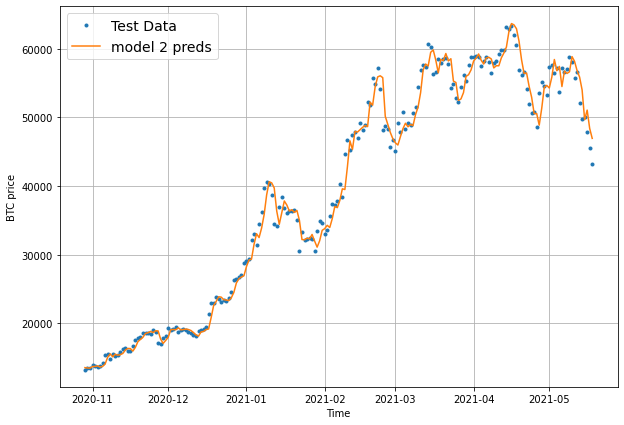

In [ ]:
offset=350
plt.figure(figsize=(10,7))

plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels[:, 0], start=offset, label='Test Data')

plot_time_series(timesteps=X_test[-len(test_windows):],values=model_2_preds, start=offset, format='-', label='model 2 preds')

In [ ]:
# Model 3: Dense model (window = 30, horizon = 7)
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)

len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                               layers.Dense(128, activation='relu'),
                               layers.Dense(HORIZON)
], name='model_3_dense')

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae', 'mse'])

model_3.fit(train_windows, train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

INFO:tensorflow:Assets written to: model_experiment/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiment

In [ ]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 1300.1525 - mae: 1300.1525 - mse: 5599956.0000


[1300.1524658203125, 1300.1524658203125, 5599956.0]

In [ ]:
model_3 = tf.keras.models.load_model('model_experiment/model_3_dense/')
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 1237.5065 - mae: 1237.5065 - mse: 5405199.0000


[1237.5064697265625, 1237.5064697265625, 5405199.0]

In [ ]:
model_3_preds = make_preds(model_3, test_windows)
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([ 513.6056  ,  355.08328 ,  327.17075 ,  358.5106  ,  420.53293 ,
         537.854   ,  545.66156 ,  485.9228  ,  584.49713 ,  687.3824  ,
         836.2264  ,  755.1576  ,  731.4958  ,  775.3399  ,  567.95544 ,
         266.80865 ,  188.80225 ,  188.10805 ,  253.095   ,  301.43256 ,
         151.10721 ,  196.8148  ,  191.46178 ,  231.65031 ,  143.61125 ,
         122.59089 ,  132.78871 ,  190.81174 ,  179.15994 ,  228.26004 ,
         314.44022 ,  379.09235 ,  278.32526 ,  295.34702 ,  299.3852  ,
         248.64983 ,  299.75668 ,  259.69434 ,  180.30531 ,  206.72922 ,
         374.62863 ,  144.85086 ,  142.33635 ,  131.11613 ,   93.941124,
          54.825542,   73.79548 ,  103.60121 ,  121.333916,  168.67278 ,
         183.90945 ,  152.25307 ,  186.57191 ,  146.91273 ,  240.42912 ,
         351.00656 ,  540.952   ,  549.1573  ,  521.2411  ,  526.8554  ,
         453.36237 ,  257.98123 ,  277.2947  ,  301.8247  ,  455.718   ,
         458.9603  ,  503.4438  ,  522.3119 

In [ ]:
# Make our evaluation work for larger horizon

def evaluate_preds(y_true, y_pred):

  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different size metrics (for longer horizons, we want to reduce metrics to a single value)
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {'mae': mae.numpy(),
          'mse': mse.numpy(),
          'rmse': rmse.numpy(),
          'mape': mape.numpy(),
          'mase': mase.numpy()}

In [ ]:
model_3_preds = make_preds(model_3, test_windows)
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1237.5065,
 'mape': 5.558879,
 'mase': 2.2020733,
 'mse': 5405198.5,
 'rmse': 1425.7478}

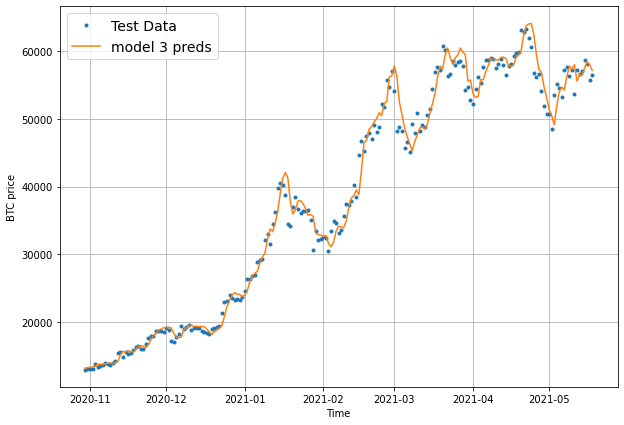

In [ ]:
offset=350
plt.figure(figsize=(10,7))

plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels[:, 0], start=offset, label='Test Data')

plot_time_series(timesteps=X_test[-len(test_windows):],values=tf.reduce_mean(model_3_preds, axis=1), start=offset, format='-', label='model 3 preds')

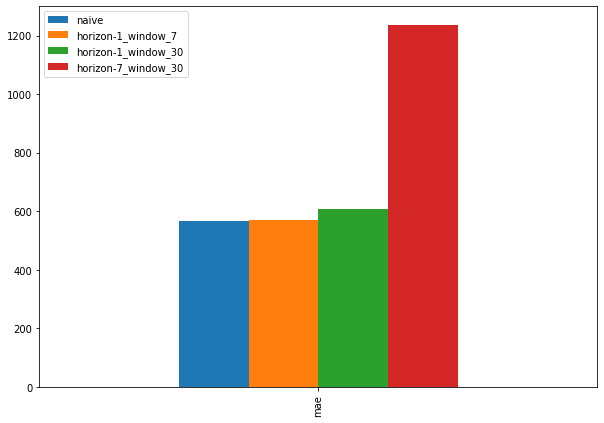

In [ ]:
# Comparing our model results so far

pd.DataFrame({'naive': naive_results['mae'],
              'horizon-1_window_7': model_1_results['mae'],
              'horizon-1_window_30': model_2_results['mae'],
              'horizon-7_window_30': model_3_results['mae']}, index = ['mae']).plot(figsize=(10,7), kind='bar')

In [ ]:
# Preparing data for model_4_Conv1D (use 1 week data to predict next day price)

HORIZON = 1
WINDOW_SIZE = 7

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)

len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

To use Conv1D layer, we need an input shape of: `(batch_size, timesteps, input_dim)` 

However, our data is not in that shape.


In [ ]:
train_windows[0].shape

(7,)

In [ ]:
# We reshape our data 

x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [ ]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))

In [ ]:
expand_dims_layer(x).shape

TensorShape([7, 1])

In [ ]:
# Model_4_Conv1D

tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
                               layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
                               layers.Conv1D(filters=128,
                                             kernel_size=7, # same as window size
                                             padding='causal',
                                             strides=1,
                                             activation='relu'),
                               layers.Dense(HORIZON)

], name='model_4_Conv1D')

model_4.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

model_4.fit(train_windows, train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

INFO:tensorflow:Assets written to: model_experiment/model_4_Conv1D/assets
INFO:tensorflow:Assets written to: model_experiment/model_4_Conv1D/assets
INFO:tensorflow:Assets written to: model_experiment/model_4_Conv1D/assets
INFO:tensorflow:Assets written to: model_experiment/model_4_Conv1D/assets
INFO:tensorflow:Assets written to: model_experiment/model_4_Conv1D/assets
INFO:tensorflow:Assets written to: model_experiment/model_4_Conv1D/assets
INFO:tensorflow:Assets written to: model_experiment/model_4_Conv1D/assets
INFO:tensorflow:Assets written to: model_experiment/model_4_Conv1D/assets
INFO:tensorflow:Assets written to: model_experiment/model_4_Conv1D/assets
INFO:tensorflow:Assets written to: model_experiment/model_4_Conv1D/assets
INFO:tensorflow:Assets written to: model_experiment/model_4_Conv1D/assets
INFO:tensorflow:Assets written to: model_experiment/model_4_Conv1D/assets
INFO:tensorflow:Assets written to: model_experiment/model_4_Conv1D/assets
INFO:tensorflow:Assets written to: mod

In [ ]:
model_4.summary()

Model: "model_4_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            6400      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 6,529
Trainable params: 6,529
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 6ms/step - loss: 615.6102 - mae: 615.6102


[615.6101684570312, 615.6101684570312]

In [ ]:
model_4 = tf.keras.models.load_model('model_experiment/model_4_Conv1D/')
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 570.7388 - mae: 570.7388


[570.73876953125, 570.73876953125]

In [ ]:
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8893.429, 8788.89 , 9020.29 , 8796.402, 8743.089, 8764.085,
       8680.323, 8538.849, 8475.116, 8526.651], dtype=float32)>

In [ ]:
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 570.7388,
 'mape': 2.5461204,
 'mase': 1.00263,
 'mse': 1183499.9,
 'rmse': 1087.8878}

In [ ]:
# Model_5_LSTM

tf.random.set_seed(42)

inputs = layers.Input(shape=(WINDOW_SIZE), name='input_layer')
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation='relu')(x)
# x = layers.Dense(32, activation='relu')(x)
outputs = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs, outputs, name='model_5_LSTM')

model_5.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
11/18 [=================>............] - ETA: 0s - loss: 2544.1982 INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


18/18 [==============================] - 4s 104ms/step - loss: 2323.6082 - val_loss: 9222.6523
Epoch 2/100
11/18 [=================>............] - ETA: 0s - loss: 947.0196 INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


18/18 [==============================] - 2s 93ms/step - loss: 695.4739 - val_loss: 1486.0555
Epoch 3/100
12/18 [===================>..........] - ETA: 0s - loss: 266.4913INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


18/18 [==============================] - 2s 94ms/step - loss: 237.3967 - val_loss: 1298.9084
Epoch 4/100
11/18 [=================>............] - ETA: 0s - loss: 196.5330INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


18/18 [==============================] - 2s 108ms/step - loss: 181.9180 - val_loss: 966.6431
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 173.4022 - val_loss: 970.9295
Epoch 6/100
12/18 [===================>..........] - ETA: 0s - loss: 170.0374INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


18/18 [==============================] - 2s 91ms/step - loss: 173.5414 - val_loss: 941.4746
Epoch 7/100
12/18 [===================>..........] - ETA: 0s - loss: 177.6533INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


18/18 [==============================] - 2s 93ms/step - loss: 170.3566 - val_loss: 898.5215
Epoch 8/100
11/18 [=================>............] - ETA: 0s - loss: 155.8568INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


18/18 [==============================] - 2s 109ms/step - loss: 157.6371 - val_loss: 887.1069
Epoch 9/100
18/18 [==============================] - 0s 7ms/step - loss: 159.0397 - val_loss: 941.6474
Epoch 10/100
18/18 [==============================] - 0s 6ms/step - loss: 166.8723 - val_loss: 932.8405
Epoch 11/100
18/18 [==============================] - 0s 6ms/step - loss: 166.4009 - val_loss: 912.6633
Epoch 12/100
18/18 [==============================] - 0s 6ms/step - loss: 169.3308 - val_loss: 911.7051
Epoch 13/100
18/18 [==============================] - 0s 6ms/step - loss: 163.4948 - val_loss: 912.0140
Epoch 14/100
18/18 [==============================] - 0s 6ms/step - loss: 161.2514 - val_loss: 954.6791
Epoch 15/100
18/18 [==============================] - 0s 6ms/step - loss: 160.0829 - val_loss: 929.0612
Epoch 16/100
12/18 [===================>..........] - ETA: 0s - loss: 149.2168INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


18/18 [==============================] - 2s 91ms/step - loss: 150.1265 - val_loss: 837.1278
Epoch 17/100
18/18 [==============================] - 0s 6ms/step - loss: 146.4163 - val_loss: 853.6611
Epoch 18/100
18/18 [==============================] - 0s 6ms/step - loss: 160.1423 - val_loss: 872.8708
Epoch 19/100
18/18 [==============================] - 0s 7ms/step - loss: 162.7851 - val_loss: 948.1257
Epoch 20/100
18/18 [==============================] - 0s 6ms/step - loss: 157.5906 - val_loss: 879.2180
Epoch 21/100
18/18 [==============================] - 0s 6ms/step - loss: 152.0355 - val_loss: 862.6780
Epoch 22/100
18/18 [==============================] - 0s 7ms/step - loss: 150.7321 - val_loss: 837.5231
Epoch 23/100
18/18 [==============================] - 0s 6ms/step - loss: 149.8567 - val_loss: 863.5777
Epoch 24/100
18/18 [==============================] - 0s 7ms/step - loss: 147.5116 - val_loss: 857.3817
Epoch 25/100
18/18 [==============================] - 0s 7ms/step - loss: 14

INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


18/18 [==============================] - 2s 94ms/step - loss: 145.0650 - val_loss: 814.3984
Epoch 27/100
12/18 [===================>..........] - ETA: 0s - loss: 150.0927INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


18/18 [==============================] - 2s 92ms/step - loss: 143.5609 - val_loss: 803.5718
Epoch 28/100
11/18 [=================>............] - ETA: 0s - loss: 144.5681INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


18/18 [==============================] - 2s 110ms/step - loss: 141.8002 - val_loss: 787.3266
Epoch 29/100
18/18 [==============================] - 0s 7ms/step - loss: 140.9612 - val_loss: 802.5436
Epoch 30/100
18/18 [==============================] - 0s 6ms/step - loss: 141.4158 - val_loss: 792.5001
Epoch 31/100
10/18 [===============>..............] - ETA: 0s - loss: 142.0063INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


18/18 [==============================] - 2s 94ms/step - loss: 138.1068 - val_loss: 769.0403
Epoch 32/100
12/18 [===================>..........] - ETA: 0s - loss: 138.4725INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


18/18 [==============================] - 2s 93ms/step - loss: 136.2222 - val_loss: 766.1755
Epoch 33/100
18/18 [==============================] - 0s 6ms/step - loss: 136.6590 - val_loss: 799.5143
Epoch 34/100
12/18 [===================>..........] - ETA: 0s - loss: 142.0704INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


18/18 [==============================] - 2s 110ms/step - loss: 136.5250 - val_loss: 751.2918
Epoch 35/100
18/18 [==============================] - 0s 7ms/step - loss: 133.8809 - val_loss: 760.8373
Epoch 36/100
18/18 [==============================] - 0s 7ms/step - loss: 154.6745 - val_loss: 755.5355
Epoch 37/100
18/18 [==============================] - 0s 6ms/step - loss: 155.9530 - val_loss: 830.3299
Epoch 38/100
12/18 [===================>..........] - ETA: 0s - loss: 138.2672INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


18/18 [==============================] - 2s 93ms/step - loss: 133.3048 - val_loss: 721.6965
Epoch 39/100
11/18 [=================>............] - ETA: 0s - loss: 132.6346INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


18/18 [==============================] - 2s 93ms/step - loss: 130.8634 - val_loss: 716.1732
Epoch 40/100
18/18 [==============================] - 0s 7ms/step - loss: 131.4340 - val_loss: 722.9932
Epoch 41/100
12/18 [===================>..........] - ETA: 0s - loss: 131.0261INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


18/18 [==============================] - 2s 91ms/step - loss: 127.9265 - val_loss: 706.7326
Epoch 42/100
18/18 [==============================] - 0s 7ms/step - loss: 126.9680 - val_loss: 711.0535
Epoch 43/100
12/18 [===================>..........] - ETA: 0s - loss: 122.4124INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


18/18 [==============================] - 2s 113ms/step - loss: 125.9146 - val_loss: 699.5353
Epoch 44/100
12/18 [===================>..........] - ETA: 0s - loss: 125.3602INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


18/18 [==============================] - 2s 93ms/step - loss: 126.0430 - val_loss: 694.9197
Epoch 45/100
11/18 [=================>............] - ETA: 0s - loss: 123.5075INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


18/18 [==============================] - 2s 93ms/step - loss: 124.3085 - val_loss: 688.0770
Epoch 46/100
18/18 [==============================] - 0s 7ms/step - loss: 125.3113 - val_loss: 688.4482
Epoch 47/100
18/18 [==============================] - 0s 6ms/step - loss: 123.8175 - val_loss: 697.9518
Epoch 48/100
12/18 [===================>..........] - ETA: 0s - loss: 120.0374INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


18/18 [==============================] - 2s 92ms/step - loss: 123.1645 - val_loss: 678.4640
Epoch 49/100
18/18 [==============================] - 0s 7ms/step - loss: 122.5108 - val_loss: 691.3553
Epoch 50/100
18/18 [==============================] - 0s 7ms/step - loss: 124.5405 - val_loss: 711.7105
Epoch 51/100
18/18 [==============================] - 0s 6ms/step - loss: 125.1063 - val_loss: 767.2324
Epoch 52/100
11/18 [=================>............] - ETA: 0s - loss: 131.8593INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


18/18 [==============================] - 3s 150ms/step - loss: 124.1389 - val_loss: 667.4606
Epoch 53/100
12/18 [===================>..........] - ETA: 0s - loss: 118.4982INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


18/18 [==============================] - 2s 93ms/step - loss: 120.9903 - val_loss: 664.1364
Epoch 54/100
18/18 [==============================] - 0s 7ms/step - loss: 120.4420 - val_loss: 668.9785
Epoch 55/100
12/18 [===================>..........] - ETA: 0s - loss: 126.5918INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


18/18 [==============================] - 2s 113ms/step - loss: 120.3250 - val_loss: 657.9633
Epoch 56/100
13/18 [====================>.........] - ETA: 0s - loss: 123.3349INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


18/18 [==============================] - 2s 126ms/step - loss: 120.8701 - val_loss: 651.8960
Epoch 57/100
18/18 [==============================] - 0s 6ms/step - loss: 123.8955 - val_loss: 676.6168
Epoch 58/100
12/18 [===================>..........] - ETA: 0s - loss: 118.5678INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


18/18 [==============================] - 2s 95ms/step - loss: 119.2845 - val_loss: 647.5352
Epoch 59/100
18/18 [==============================] - 0s 7ms/step - loss: 118.8512 - val_loss: 650.0970
Epoch 60/100
18/18 [==============================] - 0s 6ms/step - loss: 119.7555 - val_loss: 647.5708
Epoch 61/100
18/18 [==============================] - 0s 6ms/step - loss: 120.2817 - val_loss: 713.6547
Epoch 62/100
18/18 [==============================] - 0s 6ms/step - loss: 125.3769 - val_loss: 794.2551
Epoch 63/100
18/18 [==============================] - 0s 7ms/step - loss: 124.9135 - val_loss: 664.7371
Epoch 64/100
18/18 [==============================] - 0s 6ms/step - loss: 118.2151 - val_loss: 674.3691
Epoch 65/100
12/18 [===================>..........] - ETA: 0s - loss: 121.7639INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


18/18 [==============================] - 2s 91ms/step - loss: 120.2009 - val_loss: 642.3016
Epoch 66/100
12/18 [===================>..........] - ETA: 0s - loss: 117.1163INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


18/18 [==============================] - 2s 91ms/step - loss: 118.4315 - val_loss: 641.6986
Epoch 67/100
12/18 [===================>..........] - ETA: 0s - loss: 116.3646INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


18/18 [==============================] - 2s 111ms/step - loss: 119.0471 - val_loss: 634.3810
Epoch 68/100
18/18 [==============================] - 0s 7ms/step - loss: 116.6638 - val_loss: 636.2444
Epoch 69/100
18/18 [==============================] - 0s 6ms/step - loss: 120.7408 - val_loss: 634.6293
Epoch 70/100
12/18 [===================>..........] - ETA: 0s - loss: 112.3347INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


18/18 [==============================] - 2s 91ms/step - loss: 115.4599 - val_loss: 626.6802
Epoch 71/100
18/18 [==============================] - 0s 8ms/step - loss: 115.9339 - val_loss: 656.0881
Epoch 72/100
18/18 [==============================] - 0s 6ms/step - loss: 119.8699 - val_loss: 632.4766
Epoch 73/100
18/18 [==============================] - 0s 6ms/step - loss: 116.7878 - val_loss: 632.6956
Epoch 74/100
18/18 [==============================] - 0s 7ms/step - loss: 115.9789 - val_loss: 628.7859
Epoch 75/100
18/18 [==============================] - 0s 6ms/step - loss: 116.2214 - val_loss: 648.9557
Epoch 76/100
11/18 [=================>............] - ETA: 0s - loss: 116.0047INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


18/18 [==============================] - 2s 92ms/step - loss: 115.7740 - val_loss: 619.5612
Epoch 77/100
18/18 [==============================] - 0s 6ms/step - loss: 116.0982 - val_loss: 676.6539
Epoch 78/100
18/18 [==============================] - 0s 6ms/step - loss: 117.8428 - val_loss: 638.4433
Epoch 79/100
12/18 [===================>..........] - ETA: 0s - loss: 112.1811INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


18/18 [==============================] - 2s 106ms/step - loss: 114.5818 - val_loss: 615.1122
Epoch 80/100
18/18 [==============================] - 0s 7ms/step - loss: 113.7328 - val_loss: 627.4662
Epoch 81/100
18/18 [==============================] - 0s 7ms/step - loss: 113.7289 - val_loss: 633.0526
Epoch 82/100
18/18 [==============================] - 0s 6ms/step - loss: 116.9833 - val_loss: 627.6212
Epoch 83/100
18/18 [==============================] - 0s 7ms/step - loss: 113.7818 - val_loss: 646.7039
Epoch 84/100
18/18 [==============================] - 0s 6ms/step - loss: 116.0995 - val_loss: 634.6423
Epoch 85/100
18/18 [==============================] - 0s 11ms/step - loss: 115.7939 - val_loss: 626.9783
Epoch 86/100
18/18 [==============================] - 0s 10ms/step - loss: 116.1706 - val_loss: 615.6919
Epoch 87/100
11/18 [=================>............] - ETA: 0s - loss: 117.3289INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


18/18 [==============================] - 3s 154ms/step - loss: 112.9052 - val_loss: 610.0922
Epoch 88/100
13/18 [====================>.........] - ETA: 0s - loss: 115.9399INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


18/18 [==============================] - 3s 152ms/step - loss: 112.7499 - val_loss: 607.0142
Epoch 89/100
18/18 [==============================] - 0s 11ms/step - loss: 112.3718 - val_loss: 634.9385
Epoch 90/100
18/18 [==============================] - 0s 14ms/step - loss: 117.4136 - val_loss: 640.5466
Epoch 91/100
18/18 [==============================] - 0s 15ms/step - loss: 115.2679 - val_loss: 623.8539
Epoch 92/100
18/18 [==============================] - 0s 20ms/step - loss: 113.5989 - val_loss: 612.2767
Epoch 93/100
12/18 [===================>..........] - ETA: 0s - loss: 115.4645INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


18/18 [==============================] - 2s 141ms/step - loss: 113.3057 - val_loss: 602.9004
Epoch 94/100
18/18 [==============================] - 0s 7ms/step - loss: 111.8213 - val_loss: 606.6011
Epoch 95/100
15/18 [========================>.....] - ETA: 0s - loss: 111.5639INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


18/18 [==============================] - 3s 151ms/step - loss: 111.7478 - val_loss: 600.6984
Epoch 96/100
18/18 [==============================] - 0s 12ms/step - loss: 113.2104 - val_loss: 606.9620
Epoch 97/100
18/18 [==============================] - 0s 10ms/step - loss: 111.9565 - val_loss: 614.7238
Epoch 98/100
18/18 [==============================] - 0s 7ms/step - loss: 112.5009 - val_loss: 601.0434
Epoch 99/100
16/18 [=========================>....] - ETA: 0s - loss: 110.7691INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiment/model_5_LSTM/assets


18/18 [==============================] - 2s 140ms/step - loss: 111.3802 - val_loss: 598.6813
Epoch 100/100
18/18 [==============================] - 0s 11ms/step - loss: 112.7539 - val_loss: 601.1651


In [ ]:
model_5 = tf.keras.models.load_model('model_experiment/model_5_LSTM/')
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 598.6813


598.6813354492188

In [ ]:
model_5_preds = make_preds(model_5, test_windows)
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 598.68134,
 'mape': 2.6928957,
 'mase': 1.0517173,
 'mse': 1280250.9,
 'rmse': 1131.4817}

## Setting up multivariate time series

What kind of feature can we use in conjunction with time?

One feature we can add is whether elon musk tweeted on that day:
```
day 1 - 1 (tweeted)
day 2 - 0 (did not tweet)
day 3 - 0 
day 4 - 1
day 5 - 1
....
```
Or we can think of what features affect bitcoin prices such as bitcoin halving

In [ ]:
block_reward_1 = 50 # happened on 3 Jan 2009
block_reward_2 = 25 # happened on 8 Nov 2012
block_reward_3 = 12.5 # happened on 9 July 2016
block_reward_4 = 6.25 # happened on 18 May 2020

block_reward_2_datetime = np.datetime64('2012-11-28')
block_reward_3_datetime = np.datetime64('2016-07-09')
block_reward_4_datetime = np.datetime64('2020-05-18')

In [ ]:
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2421)

In [ ]:
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block['block_rewards'] = None

bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [ ]:
bitcoin_prices_block

,Price,block_rewards
Date,,
2013-10-01,123.654990,25
2013-10-02,125.455000,25
2013-10-03,108.584830,25
2013-10-04,118.674660,25
2013-10-05,121.338660,25
...,...,...
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25


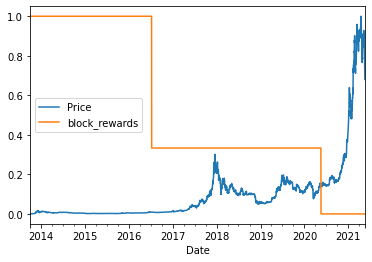

In [ ]:
# Plot block reward with price over time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[['Price', 'block_rewards']]),
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot();

In [ ]:
# Making a windowed datatset with pandas

HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
bitcoin_prices_windowed = bitcoin_prices_block.copy()

for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed['Price'].shift(periods=i+1)
bitcoin_prices_windowed.head()

,Price,block_rewards,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
# Create windows and horizon

X = bitcoin_prices_windowed.dropna().drop('Price', axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()['Price'].astype(np.float32)

In [ ]:
split_size = int(len(X)*0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [ ]:
# Model 6 Dense (multivariate time series)

tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
                               layers.Dense(128, activation='relu'),
                               layers.Dense(HORIZON)
], name='model_6_dense_multivariate')

model_6.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
13/18 [====================>.........] - ETA: 0s - loss: 1554.6086INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 40ms/step - loss: 1234.6804 - val_loss: 2061.9077
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 337.7052INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 29ms/step - loss: 351.5053 - val_loss: 1908.6733
Epoch 3/100
18/18 [==============================] - ETA: 0s - loss: 235.4153INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 35ms/step - loss: 235.4153 - val_loss: 1329.0585
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 271.0341INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 57ms/step - loss: 208.6112 - val_loss: 1102.1342
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 196.5770 - val_loss: 1107.8474
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 145.3367INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 31ms/step - loss: 187.2245 - val_loss: 1036.1720
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 231.5105INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 33ms/step - loss: 182.0245 - val_loss: 1019.2928
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 151.5176INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 47ms/step - loss: 175.7059 - val_loss: 977.8488
Epoch 9/100
13/18 [====================>.........] - ETA: 0s - loss: 169.5873INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 68ms/step - loss: 170.1784 - val_loss: 954.4037
Epoch 10/100
16/18 [=========================>....] - ETA: 0s - loss: 161.9759INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 55ms/step - loss: 164.4430 - val_loss: 913.5148
Epoch 11/100
17/18 [===========================>..] - ETA: 0s - loss: 158.9818INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 51ms/step - loss: 158.6892 - val_loss: 874.2507
Epoch 12/100
 1/18 [>.............................] - ETA: 0s - loss: 147.0429INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 45ms/step - loss: 152.0732 - val_loss: 861.0418
Epoch 13/100
18/18 [==============================] - 0s 6ms/step - loss: 151.1057 - val_loss: 886.1207
Epoch 14/100
11/18 [=================>............] - ETA: 0s - loss: 140.9192INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 46ms/step - loss: 147.5482 - val_loss: 837.8616
Epoch 15/100
15/18 [========================>.....] - ETA: 0s - loss: 145.3921INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 65ms/step - loss: 142.3497 - val_loss: 794.4788
Epoch 16/100
14/18 [======================>.......] - ETA: 0s - loss: 138.1177INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 52ms/step - loss: 137.5206 - val_loss: 778.4052
Epoch 17/100
14/18 [======================>.......] - ETA: 0s - loss: 133.2376INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 50ms/step - loss: 135.8190 - val_loss: 772.4532
Epoch 18/100
15/18 [========================>.....] - ETA: 0s - loss: 140.1422INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 51ms/step - loss: 134.8562 - val_loss: 747.4802
Epoch 19/100
18/18 [==============================] - 0s 7ms/step - loss: 130.3347 - val_loss: 761.0554
Epoch 20/100
15/18 [========================>.....] - ETA: 0s - loss: 129.3624INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 44ms/step - loss: 128.6775 - val_loss: 701.8977
Epoch 21/100
14/18 [======================>.......] - ETA: 0s - loss: 129.3930INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 49ms/step - loss: 129.5576 - val_loss: 691.0128
Epoch 22/100
13/18 [====================>.........] - ETA: 0s - loss: 133.5832INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 49ms/step - loss: 125.8060 - val_loss: 684.4119
Epoch 23/100
18/18 [==============================] - 0s 6ms/step - loss: 125.5263 - val_loss: 692.1298
Epoch 24/100
15/18 [========================>.....] - ETA: 0s - loss: 123.9486INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 43ms/step - loss: 122.4765 - val_loss: 674.2216
Epoch 25/100
17/18 [===========================>..] - ETA: 0s - loss: 121.6081INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 43ms/step - loss: 121.1171 - val_loss: 669.6441
Epoch 26/100
18/18 [==============================] - 0s 6ms/step - loss: 127.2623 - val_loss: 690.0403
Epoch 27/100
16/18 [=========================>....] - ETA: 0s - loss: 126.7325INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 45ms/step - loss: 124.6204 - val_loss: 643.9724
Epoch 28/100
18/18 [==============================] - 0s 6ms/step - loss: 118.2544 - val_loss: 656.2767
Epoch 29/100
16/18 [=========================>....] - ETA: 0s - loss: 119.0562INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 42ms/step - loss: 119.6374 - val_loss: 633.4547
Epoch 30/100
14/18 [======================>.......] - ETA: 0s - loss: 119.7359INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 42ms/step - loss: 119.5001 - val_loss: 625.3953
Epoch 31/100
18/18 [==============================] - 0s 7ms/step - loss: 114.5633 - val_loss: 668.5064
Epoch 32/100
18/18 [==============================] - ETA: 0s - loss: 116.9750INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 65ms/step - loss: 116.9750 - val_loss: 617.1061
Epoch 33/100
18/18 [==============================] - 0s 7ms/step - loss: 115.2438 - val_loss: 649.0989
Epoch 34/100
18/18 [==============================] - 0s 6ms/step - loss: 114.5187 - val_loss: 632.1375
Epoch 35/100
16/18 [=========================>....] - ETA: 0s - loss: 113.8353INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 41ms/step - loss: 113.6357 - val_loss: 607.4173
Epoch 36/100
18/18 [==============================] - 0s 6ms/step - loss: 115.2605 - val_loss: 626.4319
Epoch 37/100
15/18 [========================>.....] - ETA: 0s - loss: 116.2274INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 43ms/step - loss: 113.7020 - val_loss: 606.2318
Epoch 38/100
14/18 [======================>.......] - ETA: 0s - loss: 114.6104INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 43ms/step - loss: 111.4061 - val_loss: 603.2919
Epoch 39/100
15/18 [========================>.....] - ETA: 0s - loss: 115.8052INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 41ms/step - loss: 112.7722 - val_loss: 596.0060
Epoch 40/100
14/18 [======================>.......] - ETA: 0s - loss: 111.8961INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 41ms/step - loss: 110.5418 - val_loss: 593.2170
Epoch 41/100
18/18 [==============================] - 0s 6ms/step - loss: 110.8671 - val_loss: 609.1062
Epoch 42/100
18/18 [==============================] - 0s 7ms/step - loss: 115.7249 - val_loss: 607.4877
Epoch 43/100
18/18 [==============================] - 0s 6ms/step - loss: 111.3313 - val_loss: 606.2029
Epoch 44/100
14/18 [======================>.......] - ETA: 0s - loss: 106.7182INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 43ms/step - loss: 109.7027 - val_loss: 586.1215
Epoch 45/100
18/18 [==============================] - 0s 9ms/step - loss: 107.8748 - val_loss: 593.8445
Epoch 46/100
18/18 [==============================] - 0s 6ms/step - loss: 109.8641 - val_loss: 586.4581
Epoch 47/100
18/18 [==============================] - 0s 9ms/step - loss: 112.3587 - val_loss: 655.4489
Epoch 48/100
18/18 [==============================] - 0s 6ms/step - loss: 109.1614 - val_loss: 598.7234
Epoch 49/100
18/18 [==============================] - 0s 7ms/step - loss: 109.3029 - val_loss: 589.2489
Epoch 50/100
18/18 [==============================] - 0s 7ms/step - loss: 111.1971 - val_loss: 649.3788
Epoch 51/100
18/18 [==============================] - 0s 7ms/step - loss: 110.8514 - val_loss: 602.7667
Epoch 52/100
18/18 [==============================] - 0s 7ms/step - loss: 111.8331 - val_loss: 599.2957
Epoch 53/100
18/18 [==============================] - 0s 6ms/step - loss: 11

INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 44ms/step - loss: 110.4068 - val_loss: 575.7752
Epoch 56/100
18/18 [==============================] - 0s 7ms/step - loss: 108.6609 - val_loss: 785.9749
Epoch 57/100
18/18 [==============================] - 0s 6ms/step - loss: 124.9823 - val_loss: 670.3782
Epoch 58/100
18/18 [==============================] - 0s 6ms/step - loss: 112.8591 - val_loss: 580.2877
Epoch 59/100
18/18 [==============================] - 0s 7ms/step - loss: 107.2513 - val_loss: 597.5082
Epoch 60/100
18/18 [==============================] - 0s 7ms/step - loss: 109.2322 - val_loss: 632.2958
Epoch 61/100
18/18 [==============================] - 0s 6ms/step - loss: 109.3519 - val_loss: 591.5412
Epoch 62/100
18/18 [==============================] - 0s 6ms/step - loss: 108.4084 - val_loss: 617.5801
Epoch 63/100
18/18 [==============================] - 0s 7ms/step - loss: 113.5326 - val_loss: 613.1476
Epoch 64/100
18/18 [==============================] - 0s 7ms/step - loss: 11

INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 43ms/step - loss: 112.0475 - val_loss: 575.5540
Epoch 66/100
18/18 [==============================] - 0s 7ms/step - loss: 111.2830 - val_loss: 590.7802
Epoch 67/100
18/18 [==============================] - 0s 8ms/step - loss: 106.7918 - val_loss: 586.8840
Epoch 68/100
18/18 [==============================] - 0s 8ms/step - loss: 112.2987 - val_loss: 696.5287
Epoch 69/100
18/18 [==============================] - 0s 6ms/step - loss: 124.7808 - val_loss: 698.5261
Epoch 70/100
18/18 [==============================] - 0s 7ms/step - loss: 119.3443 - val_loss: 581.2100
Epoch 71/100
18/18 [==============================] - 0s 7ms/step - loss: 109.9960 - val_loss: 607.6742
Epoch 72/100
16/18 [=========================>....] - ETA: 0s - loss: 104.9060INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 40ms/step - loss: 106.7711 - val_loss: 573.6142
Epoch 73/100
18/18 [==============================] - 0s 6ms/step - loss: 110.2485 - val_loss: 618.8947
Epoch 74/100
18/18 [==============================] - 0s 6ms/step - loss: 105.5330 - val_loss: 574.9452
Epoch 75/100
18/18 [==============================] - 0s 6ms/step - loss: 107.3177 - val_loss: 606.1979
Epoch 76/100
18/18 [==============================] - 0s 6ms/step - loss: 107.8084 - val_loss: 582.2403
Epoch 77/100
15/18 [========================>.....] - ETA: 0s - loss: 109.5127INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 44ms/step - loss: 107.2528 - val_loss: 571.8563
Epoch 78/100
18/18 [==============================] - 0s 7ms/step - loss: 106.2309 - val_loss: 572.2830
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 105.8568 - val_loss: 596.5461
Epoch 80/100
18/18 [==============================] - 0s 6ms/step - loss: 107.8418 - val_loss: 577.2400
Epoch 81/100
15/18 [========================>.....] - ETA: 0s - loss: 106.1016INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 43ms/step - loss: 105.1101 - val_loss: 568.4897
Epoch 82/100
18/18 [==============================] - 0s 8ms/step - loss: 114.1867 - val_loss: 592.5609
Epoch 83/100
18/18 [==============================] - 0s 6ms/step - loss: 107.9631 - val_loss: 651.6213
Epoch 84/100
18/18 [==============================] - 0s 7ms/step - loss: 109.6690 - val_loss: 568.9340
Epoch 85/100
18/18 [==============================] - 0s 7ms/step - loss: 105.8219 - val_loss: 571.5334
Epoch 86/100
18/18 [==============================] - 0s 7ms/step - loss: 104.8628 - val_loss: 579.3859
Epoch 87/100
18/18 [==============================] - 0s 7ms/step - loss: 104.7148 - val_loss: 582.9178
Epoch 88/100
18/18 [==============================] - 0s 7ms/step - loss: 106.8899 - val_loss: 569.0820
Epoch 89/100
18/18 [==============================] - 0s 9ms/step - loss: 105.4376 - val_loss: 569.3439
Epoch 90/100
18/18 [==============================] - 0s 6ms/step - loss: 10

INFO:tensorflow:Assets written to: model_experiment/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 41ms/step - loss: 107.7017 - val_loss: 567.8899
Epoch 100/100
18/18 [==============================] - 0s 9ms/step - loss: 107.9951 - val_loss: 626.7441


In [ ]:
model_6.evaluate(X_test,y_test)

18/18 [==============================] - 0s 3ms/step - loss: 626.7440


626.7440185546875

In [ ]:
model_6 = tf.keras.models.load_model('model_experiment/model_6_dense_multivariate')
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 567.8899


567.889892578125

In [ ]:
model_6_preds = make_preds(model_6, X_test)
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 567.8899,
 'mape': 2.5460758,
 'mase': 0.99762523,
 'mse': 1164816.4,
 'rmse': 1079.2666}

## Building N-BEATS algorithm

* Use  tensorflow layer subclassing to make own custom layers
* using functional api to create a custom architecture

We use subclassing to create custom layers

In [ ]:
# Create NBEATS block custom layer

class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs):
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # 4 hidden fully connected layers
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation='relu') for _ in range(n_layers)]

    # output is a theta layer with linear activation

    self.theta_layer = tf.keras.layers.Dense(theta_size, activation='linear', name='theta')
  
  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)

    # output the backcast and the forecast from theta

    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [ ]:
# Testing our NBeatsBlock 

dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON,
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [ ]:
# Create dummy imputs (have to be same size as input_size)

dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)

# These are the activation outputs of the theta layer 
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.19014993  0.83798355 -0.3287001   0.2515993  -0.47540283 -0.7783665
 -0.5299447 ]
Forecast: -0.7554212808609009


In [ ]:
# Preparing data with tf.dataset

HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats['Price'].shift(periods=i+1)
bitcoin_prices_nbeats

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.654990,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.455000,123.654990,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.584830,125.455000,123.654990,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.674660,108.584830,125.455000,123.654990,NaN,NaN,NaN,NaN
2013-10-05,121.338660,118.674660,108.584830,125.455000,123.654990,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-05-14,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679


In [ ]:
# Make features and labels

X = bitcoin_prices_nbeats.dropna().drop('Price', axis =1)
y = bitcoin_prices_nbeats.dropna()['Price']

# Make train and test sets
split_size = int(len(X)*0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

In [ ]:
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping together

train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch and prefetch

BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [ ]:
# Setting up hyperparameters

N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

In [ ]:
# Get ready for residual connections, we setup 2 layers for residual connections

tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

subtracted = layers.subtract([tensor_1, tensor_2])
added = layers.add([tensor_1, tensor_2])

print(added)

tf.Tensor([10 12 14 16 18 20 22 24 26 28], shape=(10,), dtype=int32)


## Building, compiling and fit the NBEATS model

1. Setup an instance of the n-beats block layer using NBeatsBlock layer. 
2. Create an input layer for the N-Beats stack 
3. Make the initial backcast and forecast for the model with the layer created in (1)
4. Use for loops to create stacks of block layers
5. Use the NBeatsBlock class within the for loop to create blocks which return backcasts and block level forecasts
6. Create double residual stacking using subtract and add layers

In [ ]:
%%time

tf.random.set_seed(42)

# Instance of Nbeats block

nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name='InitialBlock')

# Input layer to stack
stack_input = layers.Input(shape=(INPUT_SIZE), name='stack_input')

# Inital backcast and forecast
residuals, forecast = nbeats_block_layer(stack_input)

# Stack of block layers
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already created 
  backcast, block_forecast = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name=f"NBeatsBlock_{i}")(residuals)
        
  # Create double residuals stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")


# Create the model

model_7 = tf.keras.Model(inputs=stack_input, outputs=forecast, name='model_7_NBeats')
model_7.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            verbose=0,
            validation_data=test_dataset,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                        patience=200,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                            patience=100,
                                                            verbose=1)])


Epoch 640: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 836: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 936: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 3min 17s, sys: 5.32 s, total: 3min 22s
Wall time: 4min 38s


In [ ]:
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 36ms/step - loss: 575.4680


575.4679565429688

In [ ]:
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8851.61 , 8768.778, 9002.585, 8760.08 , 8748.168, 8736.639,
       8658.818, 8496.191, 8469.895, 8501.745], dtype=float32)>

In [ ]:
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 575.46796,
 'mape': 2.6454518,
 'mase': 1.0109378,
 'mse': 1177710.8,
 'rmse': 1085.2239}

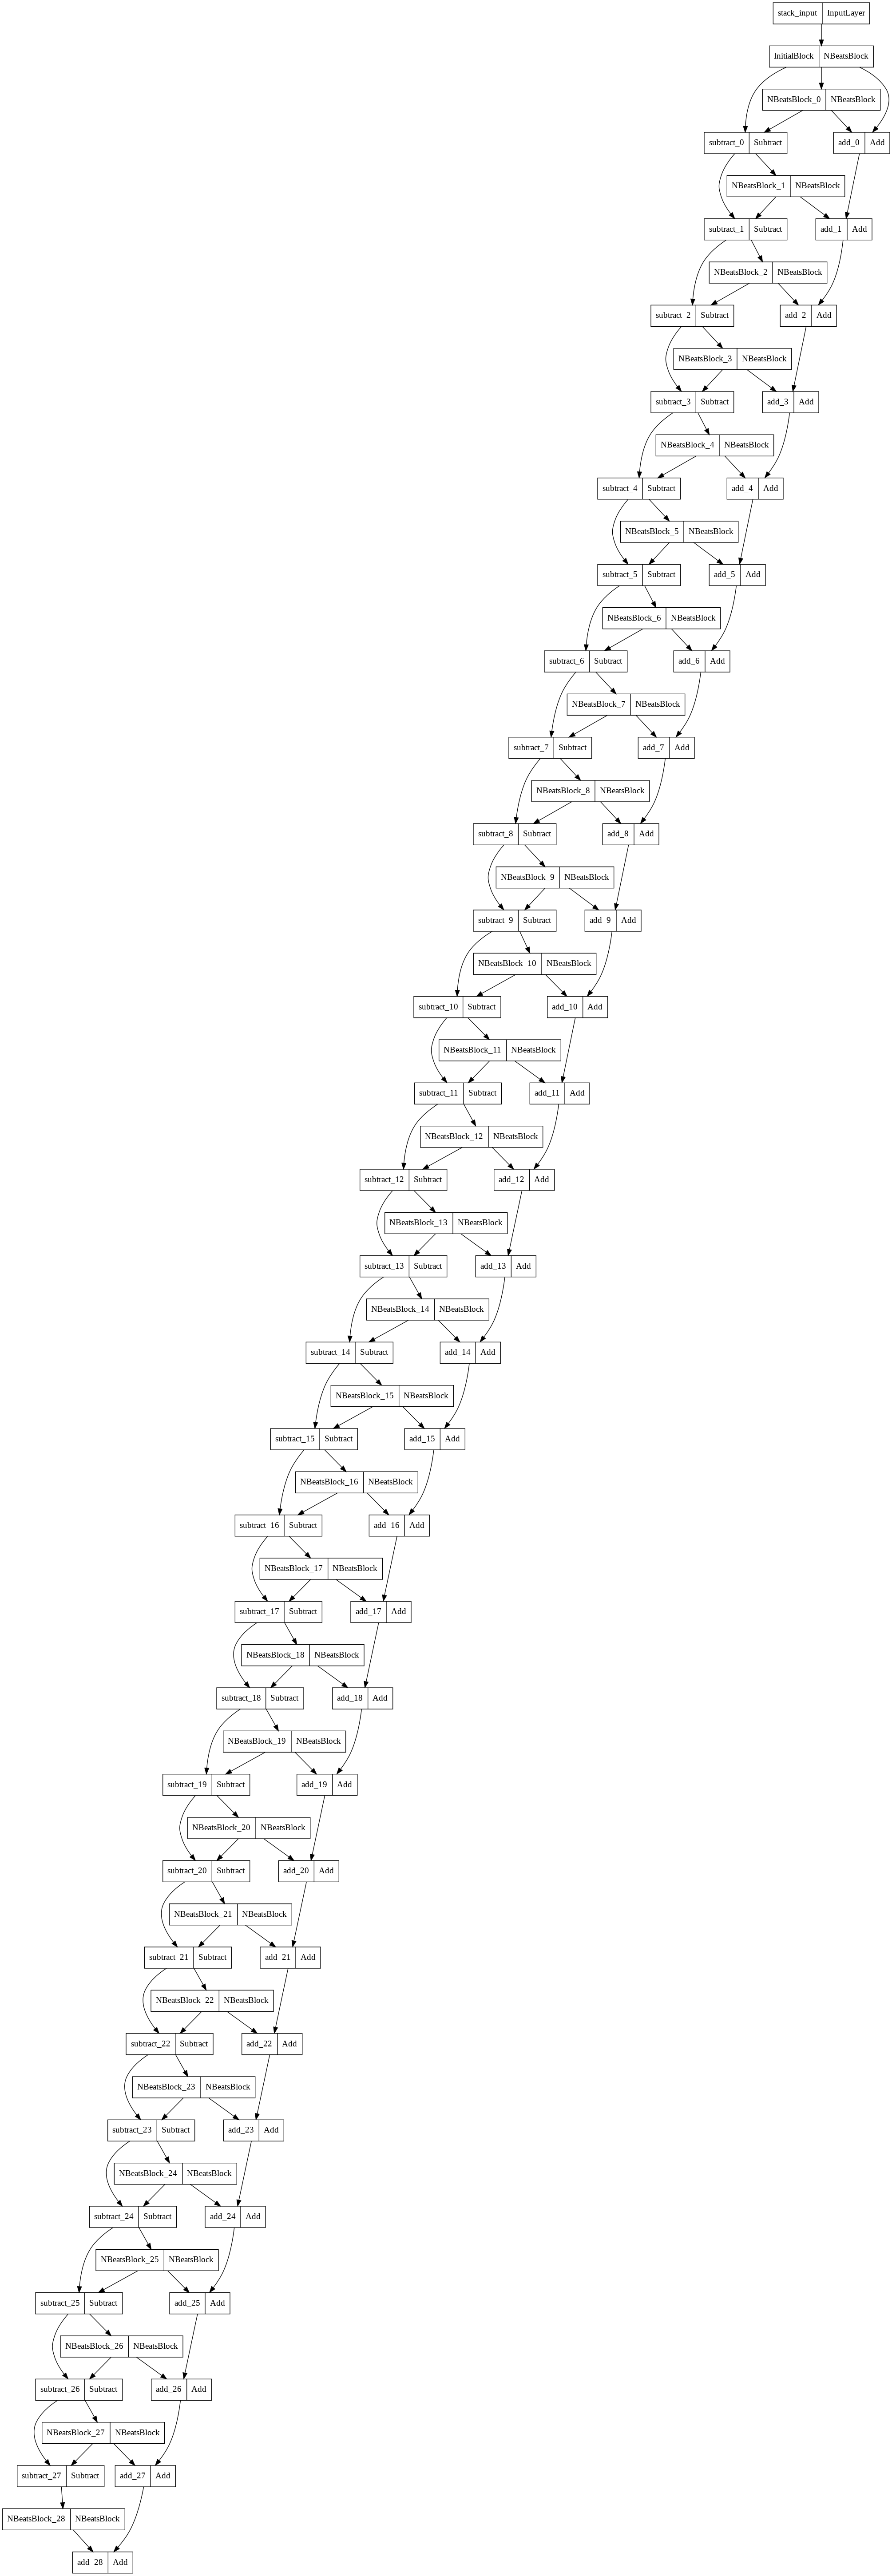

In [ ]:
# plotting the N-beats architecture

from tensorflow.keras.utils import plot_model

plot_model(model_7)

## Model_8: Creating ensemble (stacking different models together)

In [ ]:
HORIZON, WINDOW_SIZE

(1, 7)

In [ ]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fns=['mae', 'mse', 'mape']):
  
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      model = tf.keras.Sequential([
                                   layers.Dense(128, kernel_initializer='he_normal', activation='relu'),
                                   layers.Dense(128, kernel_initializer='he_normal', activation='relu'),
                                   layers.Dense(HORIZON)
      ])

      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=['mae', 'mse'])
      
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                                patience=100,
                                                                verbose=1)])
      ensemble_models.append(model)

  return ensemble_models

In [ ]:
%%time

ensemble_models = get_ensemble_models(num_iter=5, num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 830: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 510: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 610: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 168: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 268: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mae for 1000 epochs, model number: 1
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 409: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 509: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 1

Epoch 177: ReduceLROnPlateau reduci

## Make predictions with ensemble model

In [ ]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
%%time
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

CPU times: user 590 ms, sys: 20.2 ms, total: 611 ms
Wall time: 613 ms


In [ ]:
ensemble_preds

<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8804.185,  8772.93 ,  9031.23 , ..., 50141.055, 49150.414,
        46605.555],
       [ 8803.593,  8759.023,  8979.093, ..., 48924.047, 48634.8  ,
        45424.22 ],
       [ 8745.424,  8733.034,  9101.386, ..., 49267.164, 47660.426,
        45370.047],
       ...,
       [ 8832.312,  8757.505,  9092.146, ..., 49462.777, 49344.547,
        46284.145],
       [ 8725.627,  8801.214,  9100.387, ..., 49573.887, 48521.996,
        45029.176],
       [ 8819.376,  8762.987,  9041.401, ..., 49739.227, 48085.87 ,
        45842.39 ]], dtype=float32)>

In [ ]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean

<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 8782.815 ,  8776.726 ,  9057.629 ,  8716.478 ,  8744.286 ,
        8706.997 ,  8655.504 ,  8476.006 ,  8449.82  ,  8518.66  ,
        8192.196 ,  8103.1016,  8042.212 ,  7616.016 ,  7269.197 ,
        7291.689 ,  7071.9   ,  7202.4214,  7095.2744,  7529.6475,
        7369.5244,  7751.233 ,  7550.925 ,  7395.8374,  7312.8853,
        7305.5825,  7201.174 ,  7385.587 ,  7498.704 ,  7532.44  ,
        7539.9985,  7323.7124,  7226.781 ,  7174.352 ,  7182.7354,
        7228.346 ,  7072.598 ,  7097.404 ,  6862.4   ,  6580.219 ,
        7396.7607,  7151.458 ,  7166.3716,  7246.5024,  7265.903 ,
        7189.5864,  7214.401 ,  7202.9707,  7171.985 ,  7208.4067,
        7299.6353,  7378.825 ,  7239.4453,  7166.3516,  7154.5737,
        6942.979 ,  7276.321 ,  7321.8145,  7356.632 ,  7711.1885,
        8063.7866,  8139.771 ,  7854.967 ,  8094.39  ,  8093.8423,
        8165.555 ,  8090.3022,  8749.668 ,  8886.334 ,  8779.112 ,
        8935.7

In [ ]:
ensemble_median = np.median(ensemble_preds, axis = 0)
ensemble_median

array([ 8791.941 ,  8775.393 ,  9048.286 ,  8707.685 ,  8749.283 ,
        8713.508 ,  8653.315 ,  8478.887 ,  8447.453 ,  8516.945 ,
        8194.877 ,  8098.4927,  8045.8726,  7614.185 ,  7263.0425,
        7287.375 ,  7062.4214,  7193.5093,  7103.2812,  7529.6406,
        7382.4937,  7736.6743,  7564.998 ,  7378.389 ,  7321.7603,
        7308.615 ,  7199.858 ,  7388.3413,  7501.157 ,  7528.1978,
        7551.8125,  7331.9453,  7231.5586,  7176.431 ,  7179.0513,
        7221.73  ,  7081.1343,  7103.318 ,  6864.523 ,  6576.356 ,
        7385.2793,  7164.806 ,  7179.0444,  7254.735 ,  7246.803 ,
        7219.9233,  7215.769 ,  7204.438 ,  7180.714 ,  7210.731 ,
        7301.651 ,  7381.53  ,  7246.447 ,  7175.887 ,  7155.3945,
        6941.9727,  7275.7773,  7318.0415,  7353.3916,  7724.8823,
        8054.866 ,  8140.575 ,  7862.364 ,  8094.0728,  8095.5684,
        8172.394 ,  8106.5312,  8756.931 ,  8892.465 ,  8781.827 ,
        8949.683 ,  8973.257 ,  8670.696 ,  8636.97  ,  8684.0

In [ ]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_mean)
ensemble_results

{'mae': 567.21936,
 'mape': 2.5792243,
 'mase': 0.9964473,
 'mse': 1143498.0,
 'rmse': 1069.3446}

In [ ]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_median)
ensemble_results

{'mae': 567.1015,
 'mape': 2.5814197,
 'mase': 0.99624026,
 'mse': 1142698.6,
 'rmse': 1068.9708}

In [ ]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_preds)
ensemble_results

{'mae': 580.08746,
 'mape': 2.6581204,
 'mase': 1.0190529,
 'mse': 1180019.1,
 'rmse': 1086.0957}

## Plotting prediction intervals of our ensemble

One way to get 95% confidence intervals for deep learning model is bootstrap method:
1. Take the predictions from a number of randomly initialized models
2. Measure the standard deviation of the predictions
3. Multiply the standard deviation by 1.96 (assume normal distribution)
4. Add and subtract obtained from (3) to the meanmedian of the predictions made in (1)

In [ ]:
def get_upper_lower(preds):

  std = tf.math.reduce_std(preds, axis=0)

  standard_error = std * 1.96

  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - standard_error, preds_mean + standard_error
  
  return lower, upper
  

In [ ]:
lower, upper = get_upper_lower(preds=ensemble_preds)


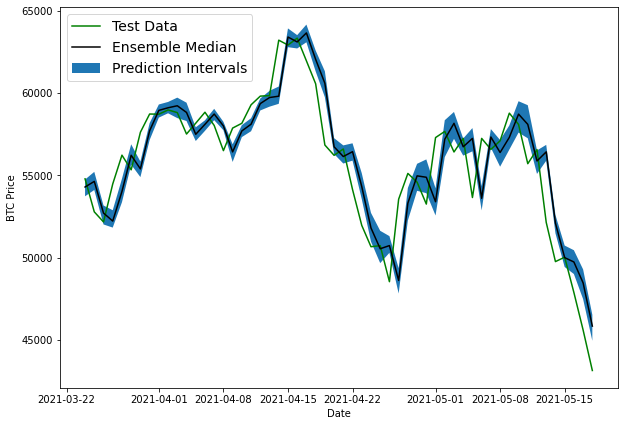

In [ ]:
# Get median/mean values
ensemble_median = np.median(ensemble_preds, axis=0)

offset = 500
plt.figure(figsize=(10,7))
plt.plot(X_test.index[offset:], y_test[offset:], 'g', label='Test Data')
plt.plot(X_test.index[offset:], ensemble_median[offset:], 'k-', label='Ensemble Median')
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label='Prediction Intervals')

plt.legend(loc='upper left', fontsize=14);

## Model 9 (Predictions into the future)

In [ ]:
bitcoin_prices_windowed

,Price,block_rewards,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.654990,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.455000,25,123.654990,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.584830,25,125.455000,123.654990,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.674660,25,108.584830,125.455000,123.654990,NaN,NaN,NaN,NaN
2013-10-05,121.338660,25,118.674660,108.584830,125.455000,123.654990,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679


In [ ]:
# Train model on entire data to make preidctions for the next day
X_all = bitcoin_prices_windowed.dropna().drop(['Price', 'block_rewards'], axis=1).to_numpy()

y_all = bitcoin_prices_windowed.dropna()['Price']

len(X_all), len(y_all)

(2780, 2780)

In [ ]:
X_all[:5], y_all[:5]

(array([[121.795  , 120.65533, 121.33866, 118.67466, 108.58483, 125.455  ,
         123.65499],
        [123.033  , 121.795  , 120.65533, 121.33866, 118.67466, 108.58483,
         125.455  ],
        [124.049  , 123.033  , 121.795  , 120.65533, 121.33866, 118.67466,
         108.58483],
        [125.96116, 124.049  , 123.033  , 121.795  , 120.65533, 121.33866,
         118.67466],
        [125.27966, 125.96116, 124.049  , 123.033  , 121.795  , 120.65533,
         121.33866]]), Date
 2013-10-08    123.03300
 2013-10-09    124.04900
 2013-10-10    125.96116
 2013-10-11    125.27966
 2013-10-12    125.92750
 Name: Price, dtype: float64)

In [ ]:
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
label_datatset_all = tf.data.Dataset.from_tensor_slices(y_all)

dataset_all = tf.data.Dataset.zip((features_dataset_all, label_datatset_all))

BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
dataset_all

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
                               layers.Dense(128, activation='relu'),
                               layers.Dense(128, activation='relu'),
                               layers.Dense(HORIZON)
])

model_9.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

model_9.fit(dataset_all,
            epochs=100,
            verbose=0)

## Make prediction into future

To make predictions into the future we want a function which:

1. Takes as input:
* a list of values (btc historical data)
* a trained model (such as model 9)
* a window into the future to predict (our `INTO_FUTURE` variable)
* the window size a model was trained on (`WINDOW_SIZE`)

2. Creates an empty list for future forecasts (this will be returned at the end of the end, when it is full of predictions and extracts the last `WINDOW_SIZE` values from the input values

3. Loop `INTO_FUTURE` times making a prediction on `WINDOW_SIZE` sequences which update to remove the first value and append the latest prediction

In [ ]:
INTO_FUTURE = 14 

In [ ]:
# 1. Create function to make predictions into the future
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:

  
  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time 
  for _ in range(into_future):
    
    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")
    
    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
  
  return future_forecast

In [ ]:
future_forecast = make_future_forecast(values=y_all,
                                        model=model_9,
                                        into_future=INTO_FUTURE,
                                        window_size=WINDOW_SIZE)

Predicting on: 
 Date
2021-05-12    56573.555472
2021-05-13    52147.821187
2021-05-14    49764.132082
2021-05-15    50032.693137
2021-05-16    47885.625255
2021-05-17    45604.615754
2021-05-18    43144.471291
Name: Price, dtype: float64 -> Prediction: 55764.47265625

Predicting on: 
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55764.47265625] -> Prediction: 50985.9296875

Predicting on: 
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55764.47265625 50985.9296875 ] -> Prediction: 48522.9609375

Predicting on: 
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55764.47265625 50985.9296875  48522.9609375 ] -> Prediction: 48137.19921875

Predicting on: 
 [47885.62525472 45604.61575361 43144.47129086 55764.47265625
 50985.9296875  48522.9609375  48137.19921875] -> Prediction: 47880.6328125

Predicting on: 
 [45604.61575361 43144.47129086 55764.47265625 50985.9296875
 48522.9609375  48137.19921875 4

In [ ]:
len(future_forecast)

14

In [ ]:
def get_future_dates(start_date, into_future, offset=1):

  start_date = start_date + np.timedelta64(offset, 'D') # specify start date, D stands for date
  end_date = start_date + np.timedelta64(into_future, 'D')
  return np.arange(start_date, end_date, dtype='datetime64[D]')


In [ ]:
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [ ]:
# get next 2 weeks of timesteps

next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [ ]:
# Insert last timestep/final price into next time steps and future forecasts 

next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55764.473, 50985.93 , 48522.96 , 48137.2  , 47880.633,
        46879.715, 48227.594, 53963.684, 49685.543, 47596.176, 48114.418,
        48807.996, 48623.85 , 50178.715], dtype=float32))

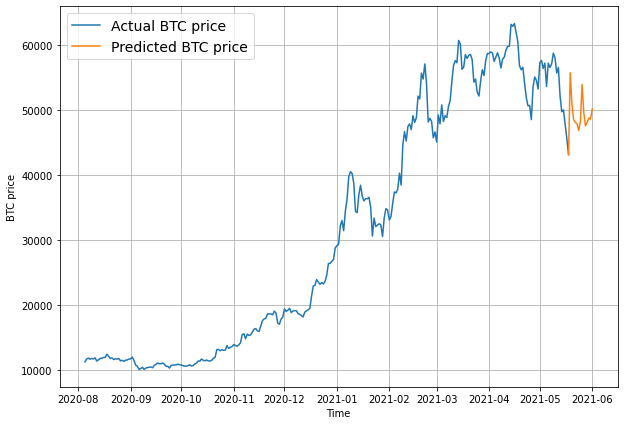

In [ ]:
# plot future prices predictions of btc

plt.figure(figsize=(10,7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format='-', label='Actual BTC price')
plot_time_series(next_time_steps, future_forecast, format='-', label = 'Predicted BTC price')

## Model 10 

In [ ]:
# Introduce a turkey problem to our btc data (price of BTC falls 100x in one day)

btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1]/100

In [ ]:
btc_price_turkey[-10:] # we changed the last price to fall by 100x

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [ ]:
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

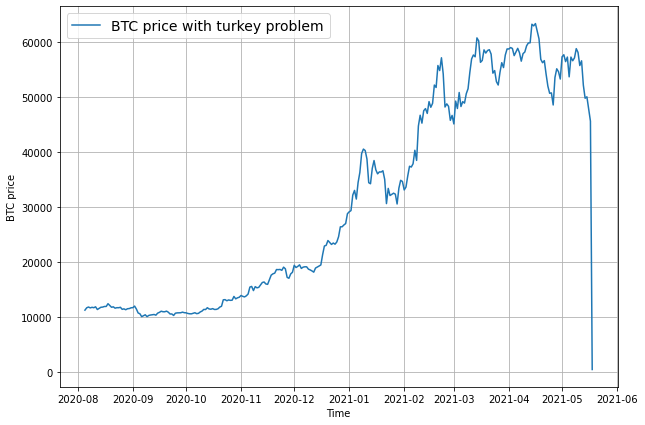

In [ ]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format='-',
                 label='BTC price with turkey problem',
                 start=2500)

In [ ]:
# Create train, test data to see if it affects the price

HORIZON = 1
WINDOW_SIZE =7

In [ ]:
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)

X_train, X_test, y_train, y_test = make_train_test_split(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

In [ ]:
# Turkey model

turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = 'model_10_turkey_model'
turkey_model.compile(loss='mae',
                     optimizer=tf.keras.optimizers.Adam())
turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 batch_size=128,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiment/model_10_turkey_model/assets


In [ ]:
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 784.3420


784.342041015625

In [ ]:
turkey_model = tf.keras.models.load_model('/content/model_experiment/model_10_turkey_model')
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 639.2444


639.244384765625

In [ ]:
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds

<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 8835.551 ,  8771.771 ,  9017.46  ,  8766.7   ,  8742.931 ,
        8721.777 ,  8657.3545,  8528.889 ,  8441.099 ,  8516.809 ,
        8246.41  ,  8108.1245,  8052.869 ,  7655.6167,  7281.385 ,
        7240.588 ,  7048.006 ,  7170.1626,  7131.6914,  7454.3296,
        7437.6753,  7677.6245,  7605.457 ,  7395.0625,  7344.6294,
        7292.2036,  7234.1675,  7358.3613,  7494.233 ,  7538.0913,
        7555.526 ,  7358.5513,  7244.3643,  7190.531 ,  7178.528 ,
        7228.9834,  7098.266 ,  7096.718 ,  6905.122 ,  6604.9927,
        7287.6694,  7219.678 ,  7158.104 ,  7261.985 ,  7232.6733,
        7220.425 ,  7209.239 ,  7213.608 ,  7192.015 ,  7216.4575,
        7295.0894,  7384.4106,  7274.707 ,  7182.2954,  7164.9985,
        6978.308 ,  7234.7837,  7337.088 ,  7354.339 ,  7674.802 ,
        8017.2495,  8125.512 ,  7870.0024,  8041.1772,  8111.6406,
        8159.988 ,  8131.5234,  8639.939 ,  8894.316 ,  8762.305 ,
        8910.7

In [ ]:
turkey_results = evaluate_preds(y_true=y_test,
                                 y_pred=turkey_preds)
turkey_results

{'mae': 17120.297,
 'mape': 121.23575,
 'mase': 26.493715,
 'mse': 613761700.0,
 'rmse': 23696.547}

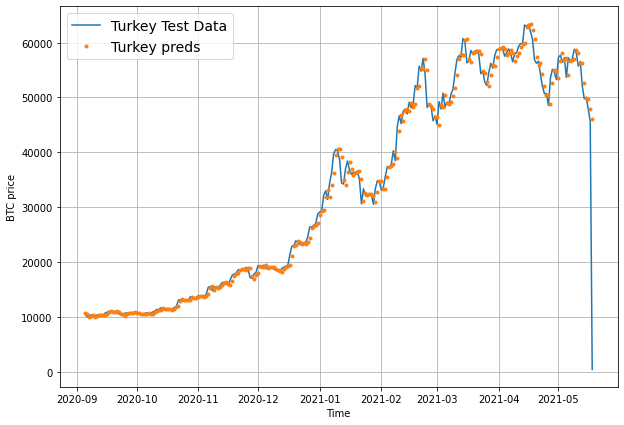

In [ ]:
plt.figure(figsize=(10,7))
offset=300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):],
                 format='-',
                 label='Turkey Test Data', start=offset)

plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label='Turkey preds', start=offset);


In [ ]:
# Comparing all model results

model_results = pd.DataFrame({'naive_model': naive_results,
                              'model_1_dense_w7_h1': model_1_results,
                              'model_2_dense_w30_h1': model_2_results,
                              'model_3_dense_w30_h7': model_3_results,
                              'model_4_Conv1D': model_4_results,
                              'model_5_LSTM': model_5_results,
                              'model_6_multivariate': model_6_results,
                              'model_7_NBEATS': model_7_results,
                              'model_8_ensemble': ensemble_results,
                              'model_10_turkey': turkey_results,
                              }).T

model_results

,mae,mse,rmse,mape,mase
naive_model,567.980225,1.147547e+06,1071.236206,2.516525,0.999570
model_1_dense_w7_h1,568.951111,1.171744e+06,1082.471069,2.544898,0.999490
model_2_dense_w30_h1,605.874084,1.273361e+06,1128.432861,2.726445,1.059074
model_3_dense_w30_h7,1237.506470,5.405198e+06,1425.747803,5.558879,2.202073
model_4_Conv1D,570.738770,1.183500e+06,1087.887817,2.546120,1.002630
model_5_LSTM,598.681335,1.280251e+06,1131.481689,2.692896,1.051717
model_6_multivariate,567.889893,1.164816e+06,1079.266602,2.546076,0.997625
model_7_NBEATS,575.467957,1.177711e+06,1085.223877,2.645452,1.010938
model_8_ensemble,580.087463,1.180019e+06,1086.095703,2.658120,1.019053
model_10_turkey,17120.296875,6.137617e+08,23696.546875,121.235748,26.493715


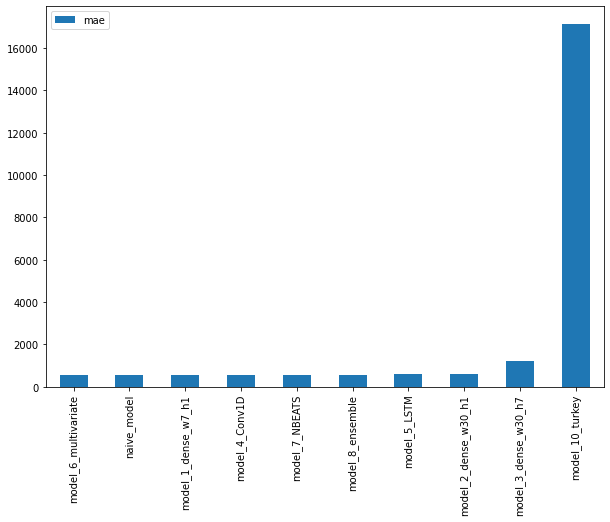

In [ ]:
model_results[['mae']].sort_values(by='mae').plot(figsize=(10,7), kind='bar')